In [1]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import torch
from torch import nn

# Hyperparameter Tuning Plots 

Let's visualize which parameters our model best performs with. We examine the following variables here:

**1)** Use just the TCGA data for fine-tuning (already confirmed. See PCA).\
**2)** Ensure data loader works properly and we get the sequences we want (works). \
**3)** Normalize gene counts and accordingly remove the soft max layer at the end of the model. Also means using MSE as loss function. \
**4)** Take the left-most tensor instead of averaging the middle two tensors together. Better metric. 

**DOWNSAMPLE TRAINING DATA NOW**: we will use only 1500 genes/sequences in order to save time for our training. The goal is just to see if we CAN overfit on new training data. 

## Fine-tuning with Raw Counts 

In [2]:
# training variables 
training_targets_raw = torch.load('240506_enformer_raw/training/training_targets.pt')
training_outputs_raw = torch.load('240506_enformer_raw/training/training_outputs.pt')
training_loss_raw = torch.load('240506_enformer_raw/training/training_loss.pt')

# validation variables
validation_targets_raw = torch.load('240506_enformer_raw/validation/validation_targets.pt')
validation_outputs_raw = torch.load('240506_enformer_raw/validation/validation_outputs.pt')
validation_loss_raw = torch.load('240506_enformer_raw/validation/validation_loss.pt')

# test variables
test_targets_raw = torch.load('240506_enformer_raw/test/test_targets.pt')
test_outputs_raw = torch.load('240506_enformer_raw/test/test_outputs.pt')
test_loss_raw = torch.load('240506_enformer_raw/test/test_loss.pt')

In [3]:
from scipy.stats import spearmanr, pearsonr

pearson_training_accuracy_raw = []
pearson_validation_accuracy_raw = []

spearman_training_accuracy_raw = []
spearman_validation_accuracy_raw = []

mean_training_loss_raw = []
mean_validation_loss_raw = []

for i in range(0, len(training_outputs_raw), 1):
    
    training_outputs_pt = np.array_split(torch.cat(training_outputs_raw[i]).cpu().detach().numpy().flatten(), 1)
    training_targets_pt = np.array_split(torch.cat(training_targets_raw[i]).cpu().detach().numpy().flatten(), 1)
    
    validation_outputs_pt = np.array_split(torch.cat(validation_outputs_raw[i]).cpu().detach().numpy().flatten(), 1)
    validation_targets_pt = np.array_split(torch.cat(validation_targets_raw[i]).cpu().detach().numpy().flatten(), 1)

    train_loss_epoch = np.mean(np.array(training_loss_raw[i]))
    validation_loss_epoch = np.mean(np.array(validation_loss_raw[i]))
    
    mean_training_loss_raw.append(train_loss_epoch)
    mean_validation_loss_raw.append(validation_loss_epoch)
    
    for j in range(0, len(training_outputs_pt), 1):
        pearson_training_corr = pearsonr(np.log(training_outputs_pt[j] + 0.00001), np.log(training_targets_pt[j] + 0.00001))
        pearson_training_accuracy_raw.append(pearson_training_corr[0])
        
        pearson_validation_corr = pearsonr(np.log(validation_outputs_pt[j] + 0.00001), np.log(validation_targets_pt[j] + 0.00001))
        pearson_validation_accuracy_raw.append(pearson_validation_corr[0])
        
        spearman_training_corr = spearmanr(np.log(training_outputs_pt[j] + 0.00001), np.log(training_targets_pt[j] + 0.00001))
        spearman_training_accuracy_raw.append(spearman_training_corr[0])
        
        spearman_validation_corr = spearmanr(np.log(validation_outputs_pt[j] + 0.00001), np.log(validation_targets_pt[j] + 0.00001))
        spearman_validation_accuracy_raw.append(spearman_validation_corr[0])
        

Text(0.5, 1.0, 'Fine-tuned Model Accuracy')

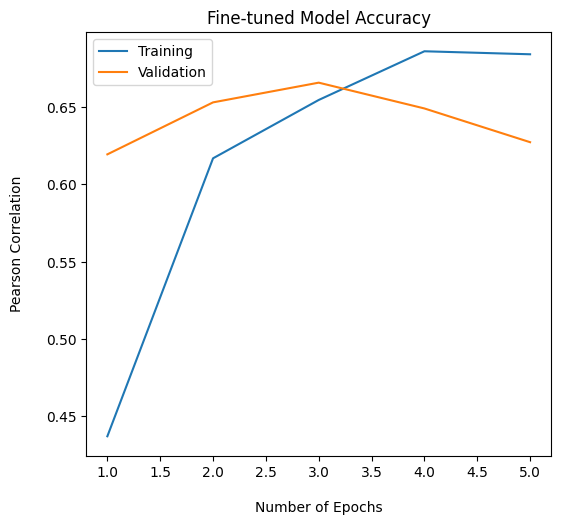

In [4]:
plt.figure(figsize=(6,5.5))
plt.plot(range(1, len(pearson_training_accuracy_raw) + 1, 1), pearson_training_accuracy_raw, label = "Training")
plt.plot(range(1, len(pearson_training_accuracy_raw) + 1, 1), pearson_validation_accuracy_raw, label = "Validation")
plt.legend()
plt.xlabel("\nNumber of Epochs")
plt.ylabel("Pearson Correlation\n")
plt.title("Fine-tuned Model Accuracy")

Text(0.5, 1.0, 'Fine-tuned Model Loss')

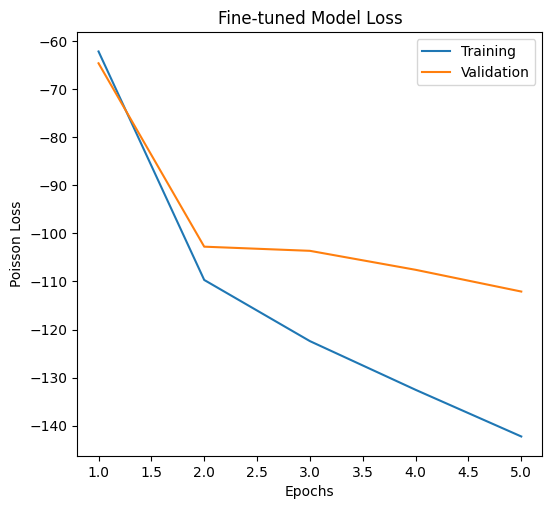

In [5]:
plt.figure(figsize=(6,5.5))
plt.plot(range(1, len(mean_training_loss_raw) + 1, 1), mean_training_loss_raw, label = "Training")
plt.plot(range(1, len(mean_validation_loss_raw) + 1, 1), mean_validation_loss_raw, label = "Validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Poisson Loss")
plt.title("Fine-tuned Model Loss")

## Fine-tuning with Normalized Counts 

In [6]:
# training variables 
training_targets_normalized = torch.load('240506_enformer_normalized/training/training_targets.pt')
training_outputs_normalized = torch.load('240506_enformer_normalized/training/training_outputs.pt')
training_loss_normalized = torch.load('240506_enformer_normalized/training/training_loss.pt')

# validation variables
validation_targets_normalized = torch.load('240506_enformer_normalized/validation/validation_targets.pt')
validation_outputs_normalized = torch.load('240506_enformer_normalized/validation/validation_outputs.pt')
validation_loss_normalized = torch.load('240506_enformer_normalized/validation/validation_loss.pt')

# test variables
test_targets_normalized = torch.load('240506_enformer_normalized/test/test_targets.pt')
test_outputs_normalized = torch.load('240506_enformer_normalized/test/test_outputs.pt')
test_loss_normalized = torch.load('240506_enformer_normalized/test/test_loss.pt')

In [7]:
from scipy.stats import spearmanr, pearsonr

pearson_training_accuracy_normalized = []
pearson_validation_accuracy_normalized = []

spearman_training_accuracy_normalized = []
spearman_validation_accuracy_normalized = []

mean_training_loss_normalized = []
mean_validation_loss_normalized = []

for i in range(0, len(training_outputs_normalized), 1):
    
    training_outputs_pt = np.array_split(torch.cat(training_outputs_normalized[i]).cpu().detach().numpy().flatten(), 1)
    training_targets_pt = np.array_split(torch.cat(training_targets_normalized[i]).cpu().detach().numpy().flatten(), 1)
    
    validation_outputs_pt = np.array_split(torch.cat(validation_outputs_normalized[i]).cpu().detach().numpy().flatten(), 1)
    validation_targets_pt = np.array_split(torch.cat(validation_targets_normalized[i]).cpu().detach().numpy().flatten(), 1)

    train_loss_epoch = np.mean(np.array(training_loss_normalized[i]))
    validation_loss_epoch = np.mean(np.array(validation_loss_normalized[i]))
    
    mean_training_loss_normalized.append(train_loss_epoch)
    mean_validation_loss_normalized.append(validation_loss_epoch)
    
    for j in range(0, len(training_outputs_pt), 1):
        pearson_training_corr = pearsonr(training_outputs_pt[j], training_targets_pt[j])
        pearson_training_accuracy_normalized.append(pearson_training_corr[0])
        
        pearson_validation_corr = pearsonr(validation_outputs_pt[j], validation_targets_pt[j])
        pearson_validation_accuracy_normalized.append(pearson_validation_corr[0])
        
        spearman_training_corr = spearmanr(training_outputs_pt[j], training_targets_pt[j])
        spearman_training_accuracy_normalized.append(spearman_training_corr[0])
        
        spearman_validation_corr = spearmanr(validation_outputs_pt[j], validation_targets_pt[j])
        spearman_validation_accuracy_normalized.append(spearman_validation_corr[0])
        

Text(0.5, 1.0, 'Fine-tuned Model Accuracy')

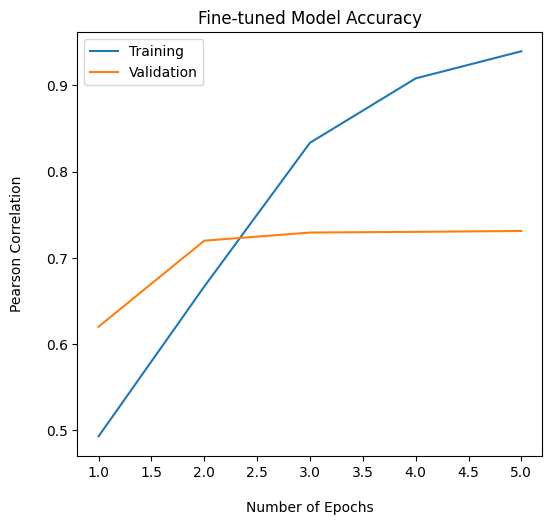

In [8]:
plt.figure(figsize=(6,5.5))
plt.plot(range(1, len(pearson_training_accuracy_normalized) + 1, 1), pearson_training_accuracy_normalized, label = "Training")
plt.plot(range(1, len(pearson_training_accuracy_normalized) + 1, 1), pearson_validation_accuracy_normalized, label = "Validation")
plt.legend()
plt.xlabel("\nNumber of Epochs")
plt.ylabel("Pearson Correlation\n")
plt.title("Fine-tuned Model Accuracy")

Text(0.5, 1.0, 'Fine-tuned Model Loss')

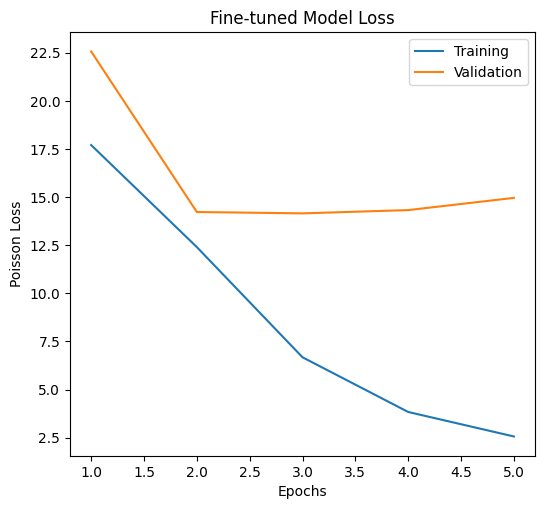

In [9]:
plt.figure(figsize=(6,5.5))
plt.plot(range(1, len(mean_training_loss_normalized) + 1, 1), mean_training_loss_normalized, label = "Training")
plt.plot(range(1, len(mean_validation_loss_normalized) + 1, 1), mean_validation_loss_normalized, label = "Validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Poisson Loss")
plt.title("Fine-tuned Model Loss")

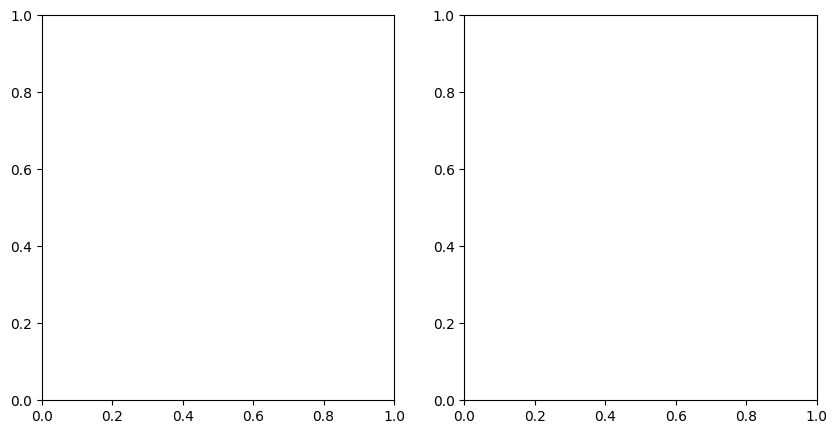

In [10]:
test_outputs_raw = torch.log(torch.cat(test_outputs_raw) + 0.00001).cpu().detach().numpy().flatten()
test_targets_raw = torch.log(torch.cat(test_targets_raw) + 0.00001).cpu().detach().numpy().flatten()

test_outputs_normalized = torch.cat(test_outputs_normalized).cpu().detach().numpy().flatten()
test_targets_normalized = torch.cat(test_targets_normalized).cpu().detach().numpy().flatten()

raw_counts = pd.concat([pd.Series(test_outputs_raw), pd.Series(test_targets_raw)], axis=1)
raw_counts.columns = ["outputs", "targets"]
normalized_counts = pd.concat([pd.Series(test_outputs_normalized), pd.Series(test_targets_normalized)], axis=1)
normalized_counts.columns = ["outputs", "targets"]

Text(0.5, 0.98, 'Test Set Predicted vs. Observed\n')

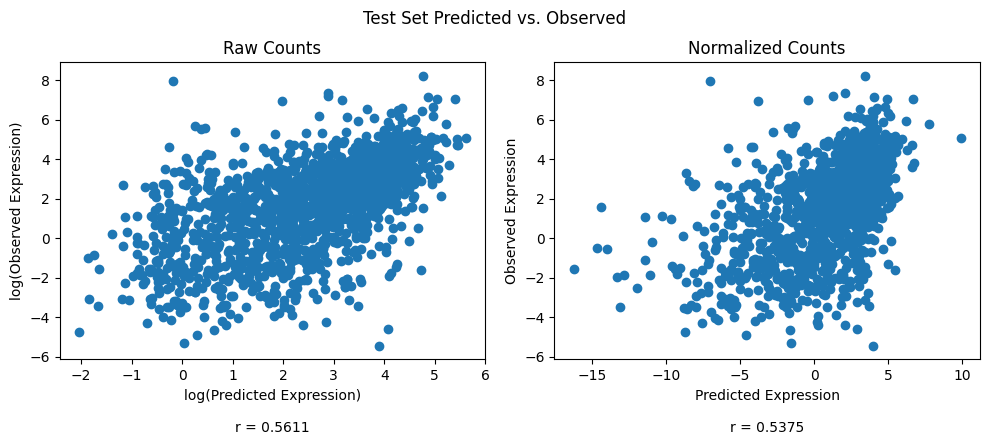

In [14]:
raw_counts = raw_counts[raw_counts['targets'] > -10]
normalized_counts = normalized_counts[normalized_counts['targets'] > -10]

raw_correlation = round(pearsonr(raw_counts['outputs'], raw_counts['targets'])[0], 4)
normalized_correlation = round(pearsonr(normalized_counts['outputs'], normalized_counts['targets'])[0], 4)

ax[0].scatter(raw_counts['outputs'], raw_counts['targets'])
ax[0].set_xlabel(f"log(Predicted Expression)\n\nr = {raw_correlation}")
ax[0].set_ylabel("log(Observed Expression)")
ax[0].set_title("Raw Counts")

ax[1].scatter(normalized_counts['outputs'], normalized_counts['targets'])
ax[1].set_xlabel(f"Predicted Expression\n\nr = {normalized_correlation}")
ax[1].set_ylabel("Observed Expression")
ax[1].set_title("Normalized Counts")

fig.tight_layout(rect=[0, 0.1, 1, 0.95])
fig.suptitle("Test Set Predicted vs. Observed\n")


After filtering out genes that have low expression, it seems we do slightly better with predicting raw counts vs. normalized counts. 

# Entire Test Set with all Training Genes

In [22]:
# test variables
test_targets_all = torch.load('240507_enformer_all_genes/test/test_targets.pt')
test_outputs_all = torch.load('240507_enformer_all_genes/test/test_outputs.pt')
test_loss_all = torch.load('240507_enformer_all_genes/test/test_loss.pt')

Text(0.5, 0.98, 'Test Set Predicted vs. Observed\n')

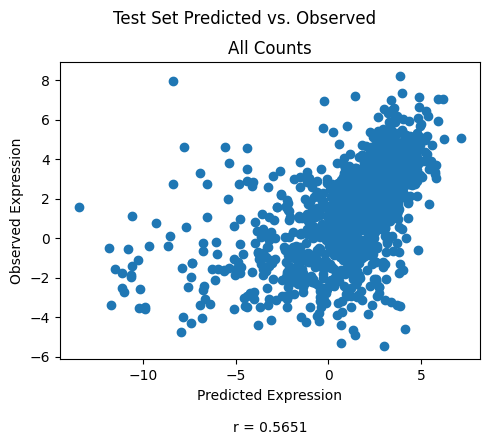

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

test_outputs_all = torch.cat(test_outputs_all).cpu().detach().numpy().flatten()
test_targets_all = torch.cat(test_targets_all).cpu().detach().numpy().flatten()

all_counts = pd.concat([pd.Series(test_outputs_all), pd.Series(test_targets_all)], axis=1)
all_counts.columns = ["outputs", "targets"]

all_counts = all_counts[all_counts['targets'] > -10]

all_correlation = round(pearsonr(all_counts['outputs'], all_counts['targets'])[0], 4)

ax.scatter(all_counts['outputs'], all_counts['targets'])
ax.set_xlabel(f"Predicted Expression\n\nr = {all_correlation}")
ax.set_ylabel("Observed Expression")
ax.set_title("All Counts")

fig.tight_layout(rect=[0, 0.1, 1, 0.95])
fig.suptitle("Test Set Predicted vs. Observed\n")